In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

class Autoencoder(tf.keras.models.Model):
    def __init__(self, bottleneck_dim):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28,1)),
            tf.keras.layers.Dense(
                50,
                activation='relu',
                kernel_initializer=tf.keras.initializers.GlorotUniform()
            ),
            tf.keras.layers.Dense(
                bottleneck_dim,
                activation='relu',
                kernel_initializer=tf.keras.initializers.GlorotUniform()
            ),
        ])
        self.decoder = tf.keras.models.Sequential([
            tf.keras.layers.Dense(
                28*28,
                activation='relu',
                kernel_initializer=tf.keras.initializers.GlorotUniform()
            ),
            tf.keras.layers.Reshape((28,28,1)),
        ])
    def call(self, x):
        return self.decoder(self.encoder(x))

ds, ds_info = tfds.load(
    'mnist',
    split='train',
    shuffle_files=True,
    batch_size=-1,
    with_info=True
)
ds['image'] = tf.cast(ds['image'], tf.float32) / 255.0

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'cache'

## Train autoencoder with bottleneck_dim = 2

In [84]:
# Setup autoencoder network with a bottleneck dim of 2
autoencoder2 = Autoencoder(2)

# Compile and fit model
learning_rate = 0.001
autoencoder2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics='mse'
)

autoencoder2.fit(
    x=ds['image'],
    y=ds['image'],
    verbose=1,
    shuffle=True,
    batch_size=8192,
    epochs=800
)

Epoch 1/800
8/8 [==============================] - 1s 46ms/step - loss: 0.1036 - mse: 0.1036
Epoch 2/800
8/8 [==============================] - 0s 46ms/step - loss: 0.0972 - mse: 0.0972
Epoch 3/800
8/8 [==============================] - 0s 46ms/step - loss: 0.0920 - mse: 0.0920
Epoch 4/800
8/8 [==============================] - 0s 46ms/step - loss: 0.0877 - mse: 0.0877
Epoch 5/800
8/8 [==============================] - 0s 46ms/step - loss: 0.0846 - mse: 0.0846
Epoch 6/800
8/8 [==============================] - 0s 45ms/step - loss: 0.0826 - mse: 0.0826
Epoch 7/800
8/8 [==============================] - 0s 45ms/step - loss: 0.0813 - mse: 0.0813
Epoch 8/800
8/8 [==============================] - 0s 47ms/step - loss: 0.0805 - mse: 0.0805
Epoch 9/800
8/8 [==============================] - 0s 47ms/step - loss: 0.0801 - mse: 0.0801
Epoch 10/800
8/8 [==============================] - 0s 46ms/step - loss: 0.0796 - mse: 0.0796
Epoch 11/800
8/8 [==============================] - 0s 45ms/step - lo

8/8 [==============================] - 0s 52ms/step - loss: 0.0714 - mse: 0.0714
Epoch 89/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0714 - mse: 0.0714
Epoch 90/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0713 - mse: 0.0713
Epoch 91/800
8/8 [==============================] - 0s 53ms/step - loss: 0.0713 - mse: 0.0713
Epoch 92/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0713 - mse: 0.0713
Epoch 93/800
8/8 [==============================] - 0s 53ms/step - loss: 0.0713 - mse: 0.0713
Epoch 94/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0713 - mse: 0.0713
Epoch 95/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0713 - mse: 0.0713
Epoch 96/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0713 - mse: 0.0713
Epoch 97/800
8/8 [==============================] - 0s 51ms/step - loss: 0.0713 - mse: 0.0713
Epoch 98/800
8/8 [==============================] - 0s 52ms/step - loss: 

8/8 [==============================] - 0s 55ms/step - loss: 0.0704 - mse: 0.0704
Epoch 175/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0704 - mse: 0.0704
Epoch 176/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0704 - mse: 0.0704
Epoch 177/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0704 - mse: 0.0704
Epoch 178/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0704 - mse: 0.0704
Epoch 179/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0704 - mse: 0.0704
Epoch 180/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0704 - mse: 0.0704
Epoch 181/800
8/8 [==============================] - 0s 53ms/step - loss: 0.0703 - mse: 0.0703
Epoch 182/800
8/8 [==============================] - 0s 53ms/step - loss: 0.0703 - mse: 0.0703
Epoch 183/800
8/8 [==============================] - 0s 51ms/step - loss: 0.0703 - mse: 0.0703
Epoch 184/800
8/8 [==============================] - 0s 50ms/ste

8/8 [==============================] - 0s 57ms/step - loss: 0.0700 - mse: 0.0700
Epoch 261/800
8/8 [==============================] - 0s 59ms/step - loss: 0.0699 - mse: 0.0699
Epoch 262/800
8/8 [==============================] - 0s 56ms/step - loss: 0.0699 - mse: 0.0699
Epoch 263/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0699 - mse: 0.0699
Epoch 264/800
8/8 [==============================] - 0s 55ms/step - loss: 0.0699 - mse: 0.0699
Epoch 265/800
8/8 [==============================] - 0s 56ms/step - loss: 0.0699 - mse: 0.0699
Epoch 266/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0699 - mse: 0.0699
Epoch 267/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0699 - mse: 0.0699
Epoch 268/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0699 - mse: 0.0699
Epoch 269/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0699 - mse: 0.0699
Epoch 270/800
8/8 [==============================] - 0s 55ms/ste

8/8 [==============================] - 0s 54ms/step - loss: 0.0698 - mse: 0.0698
Epoch 347/800
8/8 [==============================] - 0s 53ms/step - loss: 0.0698 - mse: 0.0698
Epoch 348/800
8/8 [==============================] - 0s 53ms/step - loss: 0.0698 - mse: 0.0698
Epoch 349/800
8/8 [==============================] - 0s 53ms/step - loss: 0.0698 - mse: 0.0698
Epoch 350/800
8/8 [==============================] - 0s 51ms/step - loss: 0.0698 - mse: 0.0698
Epoch 351/800
8/8 [==============================] - 0s 53ms/step - loss: 0.0698 - mse: 0.0698
Epoch 352/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0698 - mse: 0.0698
Epoch 353/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0698 - mse: 0.0698
Epoch 354/800
8/8 [==============================] - 0s 51ms/step - loss: 0.0698 - mse: 0.0698
Epoch 355/800
8/8 [==============================] - 0s 51ms/step - loss: 0.0698 - mse: 0.0698
Epoch 356/800
8/8 [==============================] - 0s 52ms/ste

8/8 [==============================] - 0s 49ms/step - loss: 0.0697 - mse: 0.0697
Epoch 433/800
8/8 [==============================] - 0s 50ms/step - loss: 0.0697 - mse: 0.0697
Epoch 434/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0697 - mse: 0.0697
Epoch 435/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0697 - mse: 0.0697
Epoch 436/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0697 - mse: 0.0697
Epoch 437/800
8/8 [==============================] - 0s 50ms/step - loss: 0.0697 - mse: 0.0697
Epoch 438/800
8/8 [==============================] - 0s 51ms/step - loss: 0.0697 - mse: 0.0697
Epoch 439/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0697 - mse: 0.0697
Epoch 440/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0697 - mse: 0.0697
Epoch 441/800
8/8 [==============================] - 0s 51ms/step - loss: 0.0697 - mse: 0.0697
Epoch 442/800
8/8 [==============================] - 0s 50ms/ste

8/8 [==============================] - 0s 48ms/step - loss: 0.0697 - mse: 0.0697
Epoch 519/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0697 - mse: 0.0697
Epoch 520/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0697 - mse: 0.0697
Epoch 521/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0697 - mse: 0.0697
Epoch 522/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0697 - mse: 0.0697
Epoch 523/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0697 - mse: 0.0697
Epoch 524/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0697 - mse: 0.0697
Epoch 525/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0697 - mse: 0.0697
Epoch 526/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0697 - mse: 0.0697
Epoch 527/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0697 - mse: 0.0697
Epoch 528/800
8/8 [==============================] - 0s 48ms/ste

8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 605/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 606/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 607/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 608/800
8/8 [==============================] - 0s 50ms/step - loss: 0.0696 - mse: 0.0696
Epoch 609/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 610/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 611/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 612/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 613/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 614/800
8/8 [==============================] - 0s 49ms/ste

8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 691/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0696 - mse: 0.0696
Epoch 692/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0696 - mse: 0.0696
Epoch 693/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 694/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0696 - mse: 0.0696
Epoch 695/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 696/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 697/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 698/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0696 - mse: 0.0696
Epoch 699/800
8/8 [==============================] - 0s 50ms/step - loss: 0.0696 - mse: 0.0696
Epoch 700/800
8/8 [==============================] - 0s 50ms/ste

8/8 [==============================] - 0s 49ms/step - loss: 0.0695 - mse: 0.0695
Epoch 777/800
8/8 [==============================] - 0s 50ms/step - loss: 0.0695 - mse: 0.0695
Epoch 778/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0695 - mse: 0.0695
Epoch 779/800
8/8 [==============================] - 0s 47ms/step - loss: 0.0695 - mse: 0.0695
Epoch 780/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0695 - mse: 0.0695
Epoch 781/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0695 - mse: 0.0695
Epoch 782/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0695 - mse: 0.0695
Epoch 783/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0695 - mse: 0.0695
Epoch 784/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0695 - mse: 0.0695
Epoch 785/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0695 - mse: 0.0695
Epoch 786/800
8/8 [==============================] - 0s 48ms/ste

(56, 280, 1)


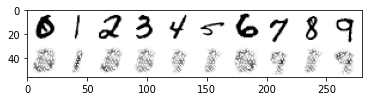

In [89]:
encoder2 = autoencoder2.encoder
decoder2 = autoencoder2.decoder

images = ds['image'].numpy()
labels = ds['label'].numpy()
decoded_images = autoencoder2(ds['image']).numpy()

image_examples = []
decoder_examples = []
# Pick random example from each label and merge
# to see how the autoencoder handles the different digits
for label in range(10):
    idx = np.random.choice(
        np.argwhere(labels==label).flatten()
    )
    image_examples.append(images[idx])
    decoder_examples.append(decoded_images[idx])
image_examples = np.concatenate(tuple(image_examples), axis=1)
decoder_examples = np.concatenate(tuple(decoder_examples), axis=1)

all_examples = np.concatenate((image_examples, decoder_examples), axis=0)
print(all_examples.shape)

plt.imshow(all_examples, cmap='Greys')

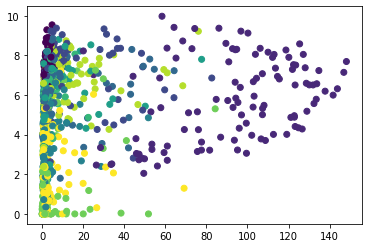

In [88]:
well_encoded_digits = ['0', '8', '9']

n_ex = 1000
encoded_images = encoder2(ds['image'][0:n_ex]).numpy()
labels = ds['label'][0:n_ex].numpy()

plt.scatter(encoded_images[:,0], encoded_images[:,1], c=labels)

## Train autoencoder with bottleneck_dim = 4

In [65]:
# Setup autoencoder network with a bottleneck dim of 2
autoencoder4 = Autoencoder(4)

# Compile and fit model
learning_rate = 0.001
autoencoder4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics='mse'
)

autoencoder4.fit(
    x=ds['image'],
    y=ds['image'],
    shuffle=True,
    batch_size=8192,
    epochs=800
)

Epoch 1/800
8/8 [==============================] - 1s 48ms/step - loss: 0.1052 - mse: 0.1052
Epoch 2/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0978 - mse: 0.0978
Epoch 3/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0918 - mse: 0.0918
Epoch 4/800
8/8 [==============================] - 0s 47ms/step - loss: 0.0863 - mse: 0.0863
Epoch 5/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0817 - mse: 0.0817
Epoch 6/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0783 - mse: 0.0783
Epoch 7/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0761 - mse: 0.0761
Epoch 8/800
8/8 [==============================] - 0s 50ms/step - loss: 0.0746 - mse: 0.0746
Epoch 9/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0733 - mse: 0.0733
Epoch 10/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0721 - mse: 0.0721
Epoch 11/800
8/8 [==============================] - 0s 49ms/step - lo

8/8 [==============================] - 0s 49ms/step - loss: 0.0501 - mse: 0.0501
Epoch 175/800
8/8 [==============================] - 1s 49ms/step - loss: 0.0501 - mse: 0.0501
Epoch 176/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0501 - mse: 0.0501
Epoch 177/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0501 - mse: 0.0501
Epoch 178/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0501 - mse: 0.0501
Epoch 179/800
8/8 [==============================] - 0s 48ms/step - loss: 0.0501 - mse: 0.0501
Epoch 180/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0501 - mse: 0.0501
Epoch 181/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0501 - mse: 0.0501
Epoch 182/800
8/8 [==============================] - 0s 50ms/step - loss: 0.0501 - mse: 0.0501
Epoch 183/800
8/8 [==============================] - 0s 49ms/step - loss: 0.0501 - mse: 0.0501
Epoch 184/800
8/8 [==============================] - 0s 49ms/ste

8/8 [==============================] - 0s 56ms/step - loss: 0.0493 - mse: 0.0493
Epoch 347/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0493 - mse: 0.0493
Epoch 348/800
8/8 [==============================] - 0s 56ms/step - loss: 0.0493 - mse: 0.0493
Epoch 349/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0493 - mse: 0.0493
Epoch 350/800
8/8 [==============================] - 0s 55ms/step - loss: 0.0493 - mse: 0.0493
Epoch 351/800
8/8 [==============================] - 0s 53ms/step - loss: 0.0493 - mse: 0.0493
Epoch 352/800
8/8 [==============================] - 0s 53ms/step - loss: 0.0493 - mse: 0.0493
Epoch 353/800
8/8 [==============================] - 0s 53ms/step - loss: 0.0493 - mse: 0.0493
Epoch 354/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0493 - mse: 0.0493
Epoch 355/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0493 - mse: 0.0493
Epoch 356/800
8/8 [==============================] - 0s 50ms/ste

8/8 [==============================] - 0s 52ms/step - loss: 0.0491 - mse: 0.0491
Epoch 519/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0491 - mse: 0.0491
Epoch 520/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0491 - mse: 0.0491
Epoch 521/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0490 - mse: 0.0490
Epoch 522/800
8/8 [==============================] - 0s 51ms/step - loss: 0.0490 - mse: 0.0490
Epoch 523/800
8/8 [==============================] - 0s 51ms/step - loss: 0.0490 - mse: 0.0490
Epoch 524/800
8/8 [==============================] - 0s 52ms/step - loss: 0.0490 - mse: 0.0490
Epoch 525/800
8/8 [==============================] - 0s 51ms/step - loss: 0.0490 - mse: 0.0490
Epoch 526/800
8/8 [==============================] - 0s 51ms/step - loss: 0.0490 - mse: 0.0490
Epoch 527/800
8/8 [==============================] - 0s 51ms/step - loss: 0.0490 - mse: 0.0490
Epoch 528/800
8/8 [==============================] - 0s 50ms/ste

8/8 [==============================] - 0s 54ms/step - loss: 0.0490 - mse: 0.0490
Epoch 691/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0490 - mse: 0.0490
Epoch 692/800
8/8 [==============================] - 0s 54ms/step - loss: 0.0490 - mse: 0.0490
Epoch 693/800
8/8 [==============================] - 0s 57ms/step - loss: 0.0490 - mse: 0.0490
Epoch 694/800
8/8 [==============================] - 0s 56ms/step - loss: 0.0490 - mse: 0.0490
Epoch 695/800
8/8 [==============================] - 0s 58ms/step - loss: 0.0490 - mse: 0.0490
Epoch 696/800
8/8 [==============================] - 0s 57ms/step - loss: 0.0490 - mse: 0.0490
Epoch 697/800
8/8 [==============================] - 0s 55ms/step - loss: 0.0490 - mse: 0.0490
Epoch 698/800
8/8 [==============================] - 0s 55ms/step - loss: 0.0490 - mse: 0.0490
Epoch 699/800
8/8 [==============================] - 0s 57ms/step - loss: 0.0490 - mse: 0.0490
Epoch 700/800
8/8 [==============================] - 0s 57ms/ste

(56, 280, 1)


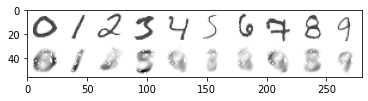

In [69]:
encoder4 = autoencoder4.encoder
decoder4 = autoencoder4.decoder

images = ds['image'].numpy()
labels = ds['label'].numpy()
decoded_images = autoencoder4(ds['image']).numpy()

image_examples = []
decoder_examples = []
# Pick random example from each label and merge
# to see how the autoencoder handles the different digits
for label in range(10):
    idx = np.random.choice(
        np.argwhere(labels==label).flatten()
    )
    image_examples.append(images[idx])
    decoder_examples.append(decoded_images[idx])
image_examples = np.concatenate(tuple(image_examples), axis=1)
decoder_examples = np.concatenate(tuple(decoder_examples), axis=1)

all_examples = np.concatenate((image_examples, decoder_examples), axis=0)
print(all_examples.shape)

plt.imshow(all_examples, cmap='Greys')